In [2]:
import dataclasses

import jax

from openpi.models import model as _model
from openpi.policies import droid_policy
from openpi.policies import policy_config as _policy_config
from openpi.shared import download
from openpi.training import config as _config
from openpi.training import data_loader as _data_loader

In [3]:
config = _config.get_config("pi0_aloha_sim")
checkpoint_dir = download.maybe_download("s3://openpi-assets/checkpoints/pi0_aloha_sim")


  0%|          | 0.00/11.2G [00:00<?, ?iB/s]

In [6]:
from openpi.policies import aloha_policy


In [7]:
example = aloha_policy.make_aloha_example()

In [8]:
example

{'state': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'images': {'cam_high': array([[[ 66,  22, 243, ..., 142,  83, 198],
          [166, 112, 179, ..., 232, 111, 119],
          [233,  99,  66, ..., 128,  43, 174],
          ...,
          [ 33,  78, 242, ..., 215, 238,  73],
          [ 63, 116, 103, ...,  13,  49,  19],
          [ 73,   7, 169, ..., 224, 206,  73]],
  
         [[207, 198, 192, ...,  12,   3,  77],
          [191,  41,  15, ...,   7, 113,  68],
          [ 99,  82,  84, ...,  28, 132, 225],
          ...,
          [117, 139, 206, ...,  83, 185, 107],
          [ 12, 128,  18, ..., 124, 146,  62],
          [ 74, 195,  45, ..., 231,  55, 234]],
  
         [[ 60, 167, 165, ..., 151, 239, 214],
          [130,  79, 174, ...,  64,  77, 207],
          [140,  37,  36, ..., 188, 118, 210],
          ...,
          [250, 128,  14, ...,  72, 220,  77],
          [183,  89,  84, ...,  51,  90, 212],
          [176, 192,  95, ...,  79, 116,  56]]], dt

In [10]:
example['images'].pop('cam_right_wrist')
example['images'].pop('cam_left_wrist')
example['images'].pop('cam_low')
example

{'state': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'images': {'cam_high': array([[[ 66,  22, 243, ..., 142,  83, 198],
          [166, 112, 179, ..., 232, 111, 119],
          [233,  99,  66, ..., 128,  43, 174],
          ...,
          [ 33,  78, 242, ..., 215, 238,  73],
          [ 63, 116, 103, ...,  13,  49,  19],
          [ 73,   7, 169, ..., 224, 206,  73]],
  
         [[207, 198, 192, ...,  12,   3,  77],
          [191,  41,  15, ...,   7, 113,  68],
          [ 99,  82,  84, ...,  28, 132, 225],
          ...,
          [117, 139, 206, ...,  83, 185, 107],
          [ 12, 128,  18, ..., 124, 146,  62],
          [ 74, 195,  45, ..., 231,  55, 234]],
  
         [[ 60, 167, 165, ..., 151, 239, 214],
          [130,  79, 174, ...,  64,  77, 207],
          [140,  37,  36, ..., 188, 118, 210],
          ...,
          [250, 128,  14, ...,  72, 220,  77],
          [183,  89,  84, ...,  51,  90, 212],
          [176, 192,  95, ...,  79, 116,  56]]], dt

In [12]:
policy = _policy_config.create_trained_policy(config, checkpoint_dir)


  0%|          | 0.00/4.07M [00:00<?, ?iB/s]

In [13]:
result = policy.infer(example)


In [15]:
result['actions'].shape

(50, 14)

In [16]:
example['images']['cam_high'].shape

(3, 224, 224)

In [18]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


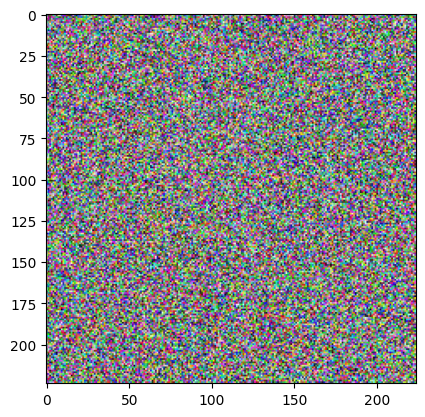

In [19]:

im = Image.fromarray(np.transpose(example['images']['cam_high']))
plt.imshow(im)
plt.show()

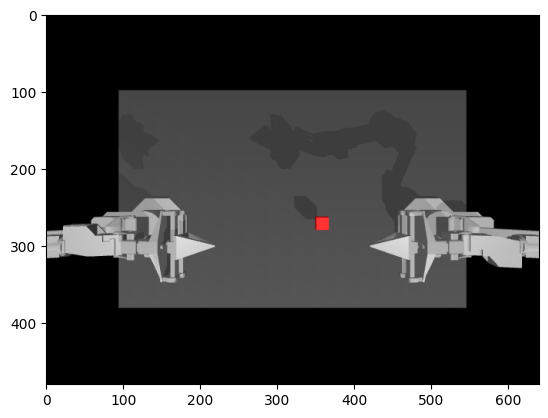

In [20]:
im_frame = Image.open('my.png')
np_frame = np.array(im_frame.getdata())
plt.imshow(im_frame)
plt.show()

In [27]:
np_frame_i = np_frame.reshape((480, 640, 3))
np_frame_i.shape

(480, 640, 3)

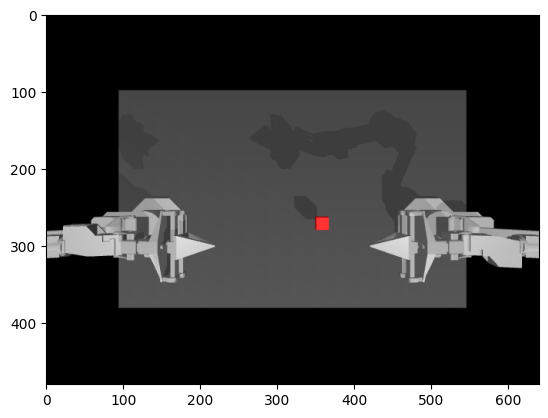

In [28]:
plt.imshow(np_frame_i)
plt.show()

In [29]:
example['images']['cam_high'] = np_frame_i

In [30]:
example['images']['cam_high'].shape

(480, 640, 3)

In [35]:
example['images']['cam_high'] = np.transpose(example['images']['cam_high'], (2, 1, 0))
example['images']['cam_high'].shape

(3, 640, 480)

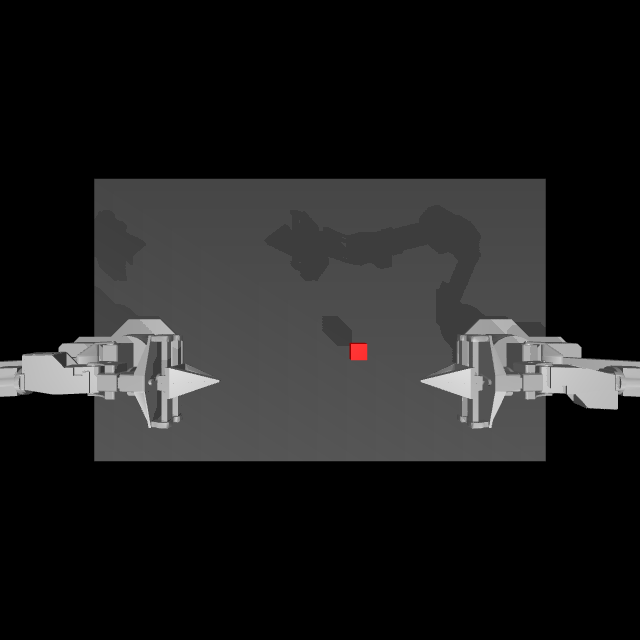

In [37]:
image = Image.open("my.png")  # Replace with the path to your image

# Get original width and height
original_width, original_height = image.size

# Set the new dimensions
new_height = 640  # New height of the image
padding_top = 80  # Top padding (80px)
padding_bottom = 80  # Bottom padding (80px)

# Calculate new size with padding
new_image = Image.new("RGB", (original_width, new_height), (0, 0, 0))  # Create a new black image
new_image.paste(image, (0, padding_top))  # Paste the original image onto the new image with padding

# Save or display the result
#new_image.save("output_image.jpg")  # Save the new image
new_image.show()  # Display the new im

In [38]:
new_frame = np.array(new_image.getdata())
new_frame.shape

(409600, 3)

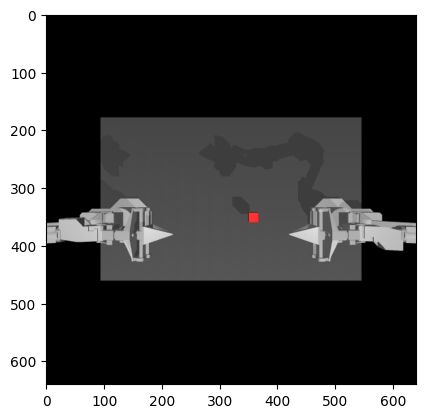

In [41]:
new_frame_i = new_frame.reshape((640, 640, 3))
new_frame_i.shape
plt.imshow(new_frame_i)
plt.show()

In [43]:
new_frame_i_t = new_frame_i.transpose(2, 1, 0)
new_frame_i_t.shape

(3, 640, 640)

In [44]:
example['images']['cam_high']  = new_frame_i_t

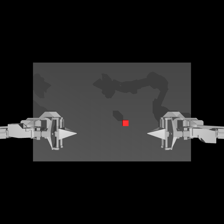

In [46]:
new_image_resized = new_image.resize((224, 224))
new_image_resized.show()

In [47]:
new_image_resized_frame = np.array(new_image_resized.getdata())
new_image_resized_frame.shape

(50176, 3)

(224, 224, 3)


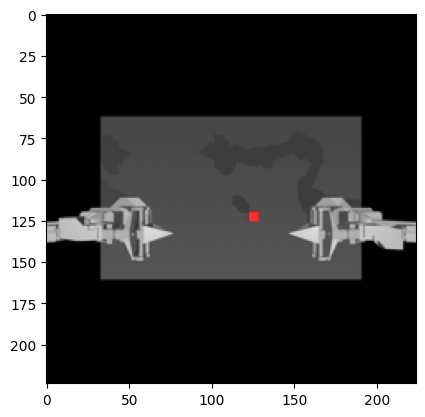

In [48]:
new_image_resized_frame_i = new_image_resized_frame.reshape((224, 224, 3))
print(new_image_resized_frame_i.shape)
plt.imshow(new_image_resized_frame_i)
plt.show()

In [49]:
new_image_resized_frame_i_t = new_image_resized_frame_i.transpose(2, 1, 0)
new_image_resized_frame_i_t.shape

(3, 224, 224)

In [50]:
example['images']['cam_high']  = new_image_resized_frame_i_t

In [51]:
result = policy.infer(example)


TypeCheckError: Type-check error whilst checking the parameters of openpi.models.model.Observation.
The problem arose whilst typechecking parameter 'images'.
Actual value: {
  'base_0_rgb':
  i32[1,224,224,3],
  'left_wrist_0_rgb':
  i32[1,224,224,3],
  'right_wrist_0_rgb':
  i32[1,224,224,3]
}
Expected type: dict[str, Union[Float[Array, '*b h w c'], Float[ShapeDtypeStruct, '*b h w c']]].
----------------------
Called with parameters: {
  'self':
  Observation(...),
  'images':
  {
    'base_0_rgb':
    i32[1,224,224,3],
    'left_wrist_0_rgb':
    i32[1,224,224,3],
    'right_wrist_0_rgb':
    i32[1,224,224,3]
  },
  'image_masks':
  {
    'base_0_rgb':
    bool[1],
    'left_wrist_0_rgb':
    bool[1],
    'right_wrist_0_rgb':
    bool[1]
  },
  'state':
  f32[1,32],
  'tokenized_prompt':
  i32[1,48],
  'tokenized_prompt_mask':
  bool[1,48],
  'token_ar_mask':
  None,
  'token_loss_mask':
  None
}
Parameter annotations: (self: Any, images: dict[str, Union[Float[Array, '*b h w c'], Float[ShapeDtypeStruct, '*b h w c']]], image_masks: dict[str, Union[Bool[Array, '*b'], Bool[ShapeDtypeStruct, '*b']]], state: Union[Float[Array, '*b s'], Float[ShapeDtypeStruct, '*b s']], tokenized_prompt: Union[Int[Array, '*b l'], Int[ShapeDtypeStruct, '*b l'], NoneType], tokenized_prompt_mask: Union[Bool[Array, '*b l'], Bool[ShapeDtypeStruct, '*b l'], NoneType], token_ar_mask: Union[Int[Array, '*b l'], Int[ShapeDtypeStruct, '*b l'], NoneType], token_loss_mask: Union[Bool[Array, '*b l'], Bool[ShapeDtypeStruct, '*b l'], NoneType]) -> Any.


In [52]:
example

{'state': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'images': {'cam_high': array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]]])},
 'prompt': 'do something'}

In [53]:
example = aloha_policy.make_aloha_example()
example['images'].pop('cam_right_wrist')
example['images'].pop('cam_left_wrist')
example['images'].pop('cam_low')
example

{'state': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'images': {'cam_high': array([[[154, 163,  52, ..., 142,  21, 163],
          [174, 132,  79, ..., 152,  42, 118],
          [188,  49, 190, ...,  11, 254, 195],
          ...,
          [217,  88, 248, ...,  87,  24, 184],
          [191,  35,  12, ...,  42,  63, 240],
          [ 95, 114,  75, ..., 232,  16, 175]],
  
         [[  4, 239,  97, ..., 184, 151, 183],
          [204, 176,  98, ..., 115,  23,   1],
          [168, 184, 155, ...,  71, 120,  39],
          ...,
          [227,  71, 183, ..., 135,  82, 249],
          [ 91, 245, 172, ...,   1,  17,  56],
          [108, 209, 249, ..., 111, 201, 143]],
  
         [[237, 234,  36, ...,  32, 211, 146],
          [254, 125,  41, ..., 150, 255,  20],
          [ 76, 184,  26, ..., 159, 148, 126],
          ...,
          [253, 224,  50, ...,  81, 235,  96],
          [106, 109,  72, ..., 196,  15, 167],
          [172, 145,  41, ...,  79,  34,  83]]], dt

In [54]:
result = policy.infer(example)


In [58]:
print(example['images']['cam_high'].shape)
example['images']['cam_high']  = np.array(new_image_resized_frame_i_t, dtype='uint8')

print(example['images']['cam_high'].shape)
example

(3, 224, 224)
(3, 224, 224)


{'state': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'images': {'cam_high': array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)},
 'prompt': 'do something'}

In [59]:
result = policy.infer(example)


In [60]:
result

{'actions': array([[ 3.06985906e-03, -7.62168232e-01,  1.11172120e+00,
         -1.94935791e-02, -3.92537578e-01, -3.91067340e-02,
          2.23643718e-01, -3.29584572e-02, -2.83053798e-01,
          9.23404330e-01, -6.76800219e-02, -1.94676964e-01,
          7.17703299e-02,  1.00878814e+00],
        [ 2.67679103e-03, -7.58267993e-01,  1.11159247e+00,
         -1.95932796e-02, -3.87331152e-01, -3.87622161e-02,
          2.26386621e-01, -3.11227204e-02, -2.75945102e-01,
          9.23678370e-01, -6.56526609e-02, -1.96984318e-01,
          8.39174507e-02,  1.01172414e+00],
        [ 2.71519205e-03, -7.66912126e-01,  1.11272093e+00,
         -1.99692155e-02, -3.87671331e-01, -3.62485454e-02,
          2.25921735e-01, -3.09529695e-02, -2.75763649e-01,
          9.24893910e-01, -7.16442669e-02, -1.94572414e-01,
          1.05903626e-01,  1.01958719e+00],
        [ 2.55845565e-03, -7.78277908e-01,  1.11468856e+00,
         -1.97498800e-02, -3.84636398e-01, -3.61206280e-02,
          2.25579